In [1]:
import os
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,NaN,NaN,...,318,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,NaN,NaN,...,14,NaN,NaN,197,NaN,NaN,1,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,NaN,NaN,...,1,NaN,NaN,27,NaN,NaN,1,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,NaN,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [3]:
# 모든 행이 비어있는 열 이름 찾음
null_count = 40506
columns_with_nulls = train_data.columns[train_data.isnull().sum() == null_count]

print("Columns with 40506 null values:", columns_with_nulls)

Columns with 40506 null values: Index(['CURE END POSITION X Unit Time_Dam',
       'CURE END POSITION X Judge Value_Dam',
       'CURE END POSITION Z Unit Time_Dam',
       'CURE END POSITION Z Judge Value_Dam',
       'CURE END POSITION Θ Unit Time_Dam',
       'CURE END POSITION Θ Judge Value_Dam', 'CURE SPEED Unit Time_Dam',
       'CURE SPEED Judge Value_Dam', 'CURE STANDBY POSITION X Unit Time_Dam',
       'CURE STANDBY POSITION X Judge Value_Dam',
       ...
       'Machine Tact time Unit Time_Fill2',
       'Machine Tact time Judge Value_Fill2', 'PalletID Unit Time_Fill2',
       'PalletID Judge Value_Fill2', 'Production Qty Unit Time_Fill2',
       'Production Qty Judge Value_Fill2', 'Receip No Unit Time_Fill2',
       'Receip No Judge Value_Fill2', 'WorkMode Unit Time_Fill2',
       'WorkMode Judge Value_Fill2'],
      dtype='object', length=278)


In [4]:
# Drop those columns
train_data_cleaned = train_data.drop(columns=columns_with_nulls)

# 3차원좌표들 PCA이용한 차원축소

In [5]:
from sklearn.decomposition import PCA
demo = train_data_cleaned.copy()

In [6]:
groups = [
    ['HEAD Standby Position X Collect Result_Dam',
     'HEAD Standby Position Y Collect Result_Dam',
     'HEAD Standby Position Z Collect Result_Dam'],

    ['Head Clean Position X Collect Result_Dam',
     'Head Clean Position Y Collect Result_Dam',
     'Head Clean Position Z Collect Result_Dam'],

    ['Head Purge Position X Collect Result_Dam',
     'Head Purge Position Y Collect Result_Dam',
     'Head Purge Position Z Collect Result_Dam'],

    ['HEAD Standby Position X Collect Result_Fill1',
     'HEAD Standby Position Y Collect Result_Fill1',
     'HEAD Standby Position Z Collect Result_Fill1'],

    ['Head Clean Position X Collect Result_Fill1',
     'Head Clean Position Y Collect Result_Fill1',
     'Head Clean Position Z Collect Result_Fill1'],

    ['Head Purge Position X Collect Result_Fill1',
     'Head Purge Position Y Collect Result_Fill1',
     'Head Purge Position Z Collect Result_Fill1'],

    ['HEAD Standby Position X Collect Result_Fill2',
     'HEAD Standby Position Y Collect Result_Fill2',
     'HEAD Standby Position Z Collect Result_Fill2'],

    ['Head Clean Position X Collect Result_Fill2',
     'Head Clean Position Y Collect Result_Fill2',
     'Head Clean Position Z Collect Result_Fill2'],

    ['Head Purge Position X Collect Result_Fill2',
     'Head Purge Position Y Collect Result_Fill2',
     'Head Purge Position Z Collect Result_Fill2'],
    
    ['PalletID Collect Result_Fill1',
    'PalletID Collect Result_Dam',
    'PalletID Collect Result_Fill2']
    ]

Group 1 - Variance captured by the first component: 99.92%


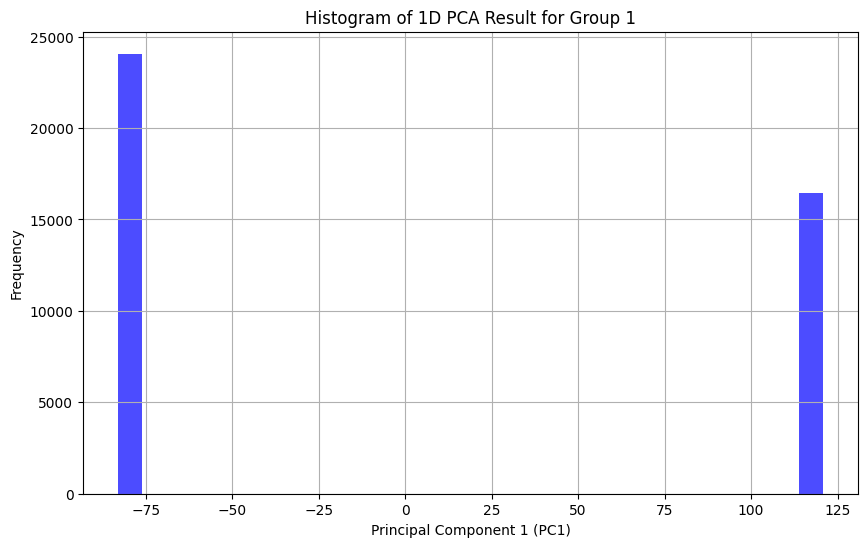

Group 2 - Variance captured by the first component: 99.98%


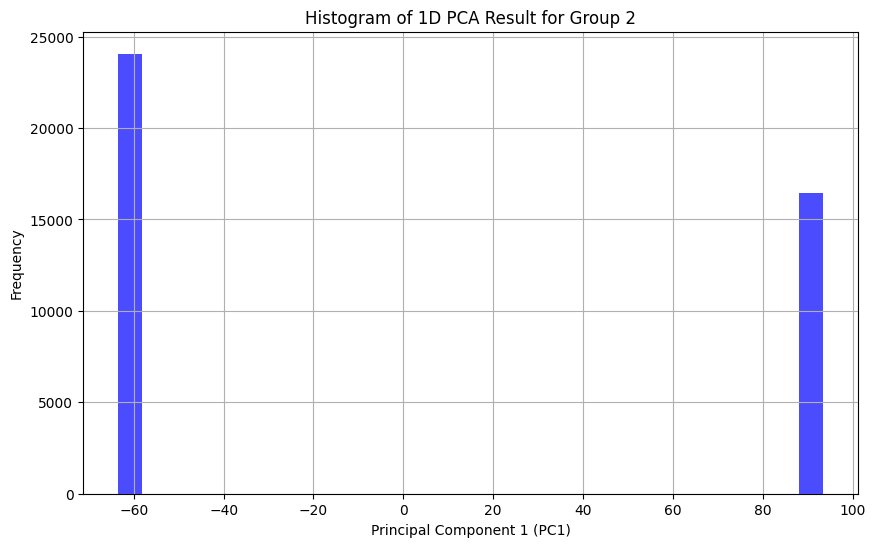

Group 3 - Variance captured by the first component: 99.96%


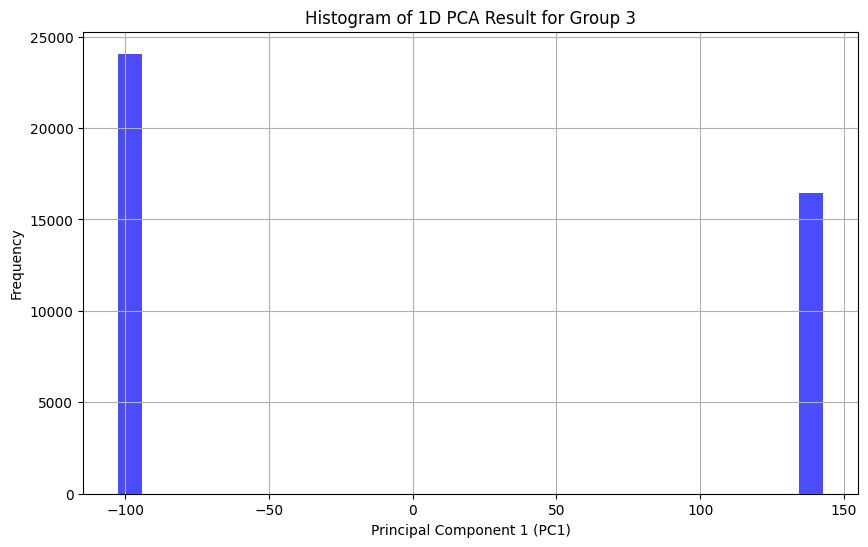

Group 4 - Variance captured by the first component: 100.00%


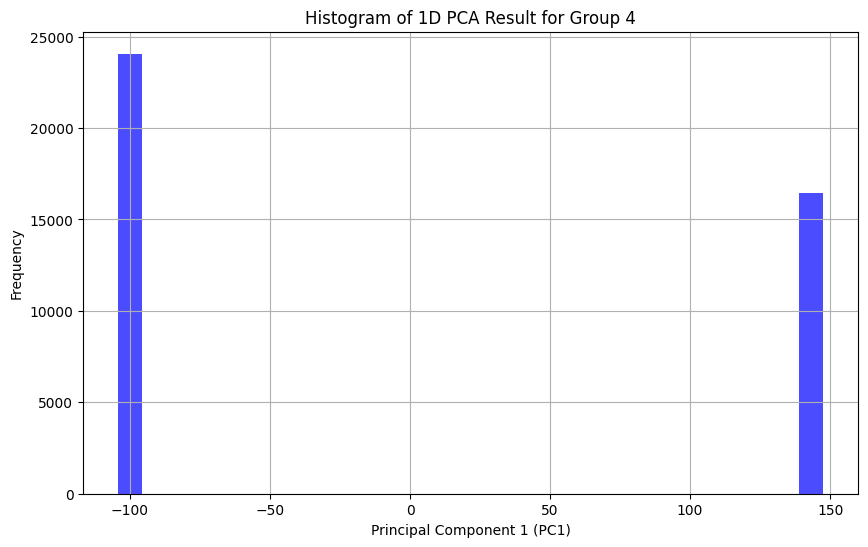

Group 5 - Variance captured by the first component: 100.00%


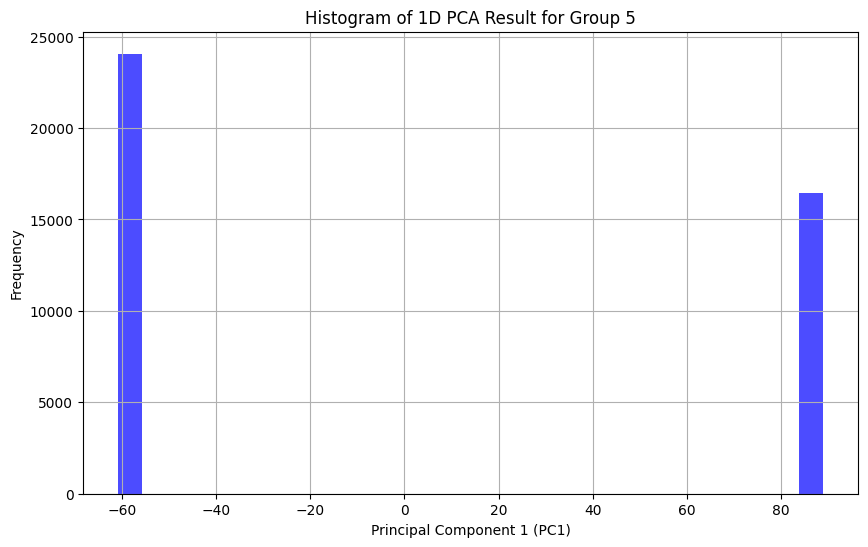

Group 6 - Variance captured by the first component: 98.57%


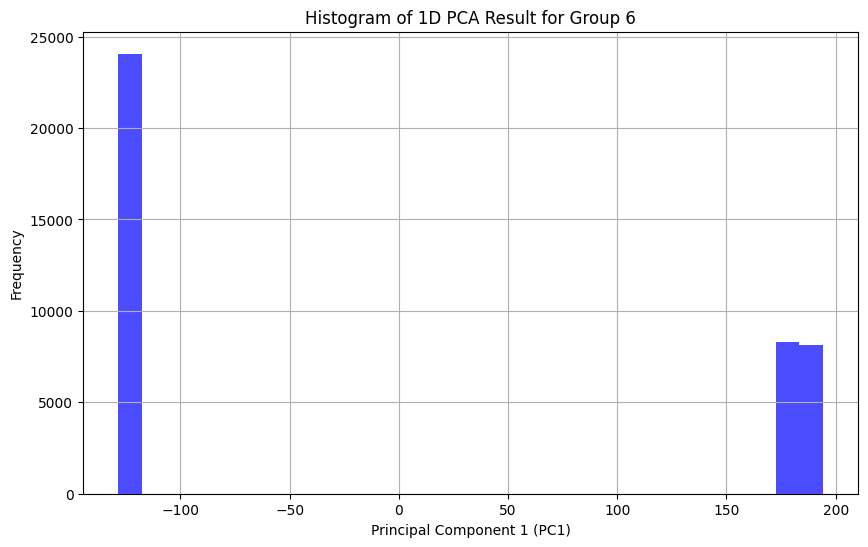

Group 7 - Variance captured by the first component: 100.00%


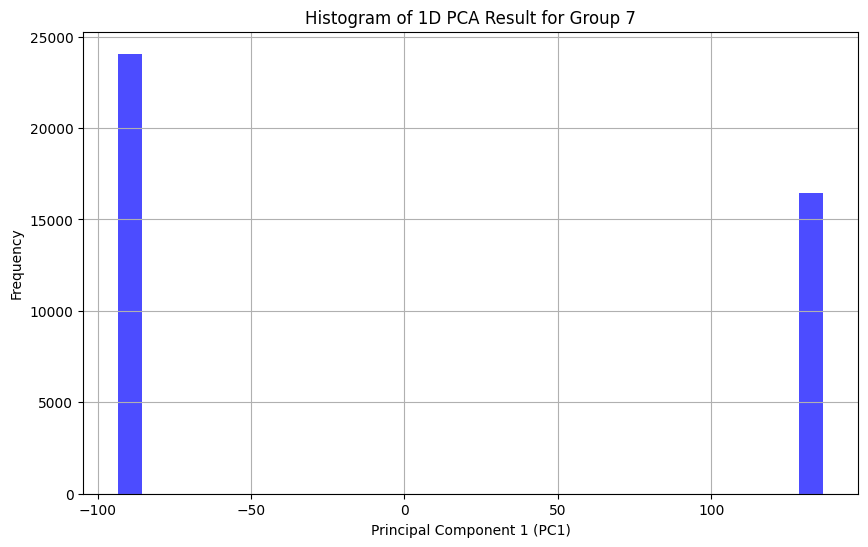

Group 8 - Variance captured by the first component: 100.00%


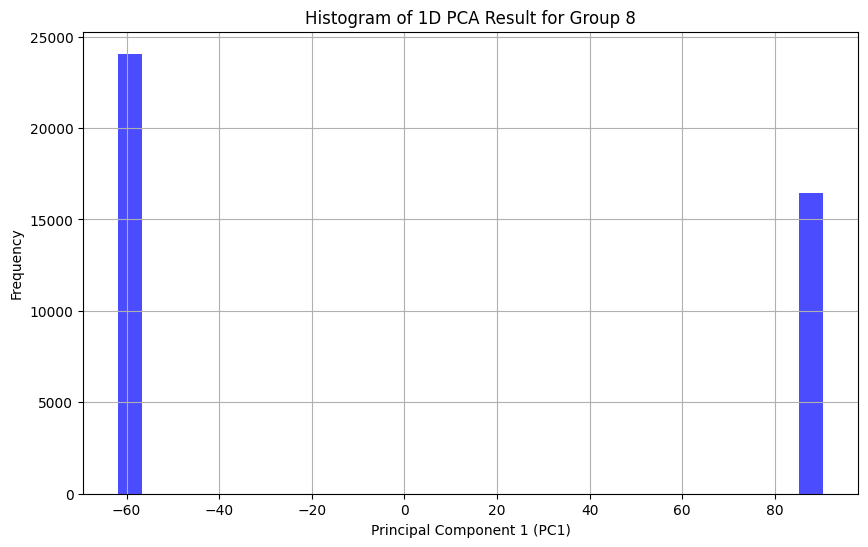

Group 9 - Variance captured by the first component: 100.00%


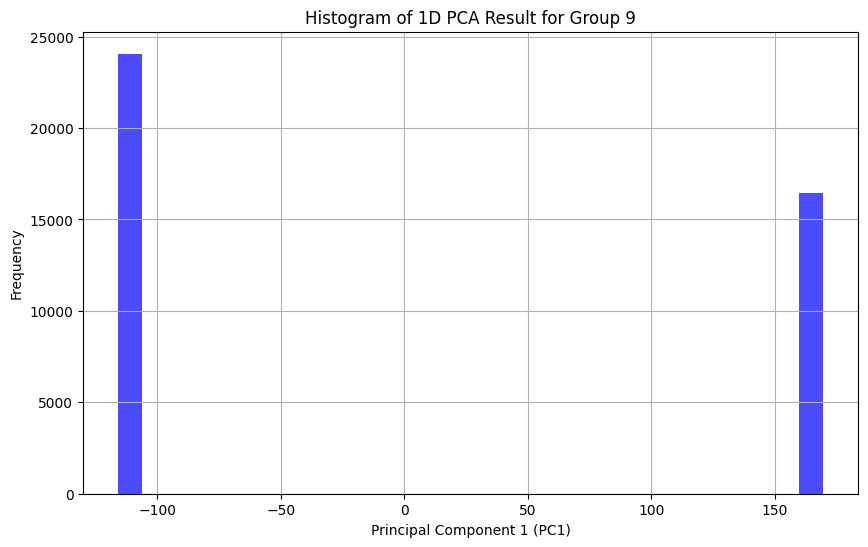

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns
for i, group in enumerate(groups):
    # Drop rows with missing values in the current group
    clean_data_group = demo[group].dropna()
    
    # Apply PCA with 1 component
    pca = PCA(n_components=1)
    pca_result = pca.fit_transform(clean_data_group)
    
    # Analyze the explained variance
    explained_variance_ratio = pca.explained_variance_ratio_[0]
    print(f"Group {i+1} - Variance captured by the first component: {explained_variance_ratio * 100:.2f}%")
    
    # Create a DataFrame for the PCA results
    pca_df = pd.DataFrame(pca_result, columns=['PC1'])
    
    # Visualization: Histogram of the 1D PCA result
    plt.figure(figsize=(10, 6))
    plt.hist(pca_df['PC1'], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of 1D PCA Result for Group {i+1}')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

sample_numerical_columns = numerical_columns[20:30]  # Taking the first 10 numerical columns for visualization

# Plot the distribution of selected numerical features
plt.figure(figsize=(20, 30))
for i, col in enumerate(sample_numerical_columns, 1):
    plt.subplot(10, 2, 2*i-1)
    sns.histplot(train_data_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(10, 2, 2*i)
    sns.boxplot(x=train_data_cleaned[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()
///

# 랜덤포레스트

In [7]:
# 차원축소
pca_data_cleaned = train_data_cleaned.copy()

# List to keep track of the names of the new PCA features
new_pca_columns = []

for i, group in enumerate(groups):
    # Drop rows with missing values in the current group
    clean_data_group = pca_data_cleaned[group].dropna()
    
    # Apply PCA with 1 component
    pca = PCA(n_components=1)
    pca_result = pca.fit_transform(clean_data_group)
    
    # Analyze the explained variance
    explained_variance_ratio = pca.explained_variance_ratio_[0]
    print(f"Group {i+1} - Variance captured by the first component: {explained_variance_ratio * 100:.2f}%")
    
    # Create a new column for the PCA result in the original DataFrame
    pca_column_name = f'PCA_Group_{i+1}_PC1'
    pca_data_cleaned[pca_column_name] = pd.Series(pca_result.flatten(), index=clean_data_group.index)
    
    # Add the new column name to the list
    new_pca_columns.append(pca_column_name)
    
    # Drop the original columns that were used in this group
    pca_data_cleaned.drop(columns=group, inplace=True)

# Display the updated DataFrame
print(pca_data_cleaned.head())

# Optional: Save the updated DataFrame if needed
# pca_data_cleaned.to_csv('train_data_cleaned_with_pca.csv', index=False)

Group 1 - Variance captured by the first component: 99.92%
Group 2 - Variance captured by the first component: 99.98%
Group 3 - Variance captured by the first component: 99.96%
Group 4 - Variance captured by the first component: 100.00%
Group 5 - Variance captured by the first component: 100.00%
Group 6 - Variance captured by the first component: 98.57%
Group 7 - Variance captured by the first component: 100.00%
Group 8 - Variance captured by the first component: 100.00%
Group 9 - Variance captured by the first component: 100.00%
Group 10 - Variance captured by the first component: 98.52%
  Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4      IVI-OB6     Dam Dispenser  Dam dispenser #

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `train_data_cleaned` is your DataFrame
# Select only the numerical columns
numerical_data = pca_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for all numerical columns
correlation_matrix = numerical_data.corr()

#절대상관관계가 1 인 특성 쌍을 필터링하여 표시
high_correlation_pairs = correlation_matrix.stack().reset_index()
high_correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter out self-correlations (where Feature_1 == Feature_2) and keep only correlations 1
filtered_correlations = high_correlation_pairs[
    (abs(high_correlation_pairs['Correlation']) == 1) & (high_correlation_pairs['Feature_1'] != high_correlation_pairs['Feature_2'])
].sort_values(by='Correlation', ascending=False)

filtered_correlations

,Feature_1,Feature_2,Correlation
225,CURE END POSITION Θ Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,1.0
552,CURE START POSITION Θ Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,1.0
4219,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,1.0
4326,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,1.0
4327,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,1.0
4328,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,1.0
4885,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,1.0
4886,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,1.0
4994,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,1.0
4996,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,1.0


상관계수 1인 것들끼리 덴드로그램 그려보고 임계값을 1.5로 정해서 군집 6개를 만들고 PCA 차원축소 진행 -> 원래 분산을 얼마나 설명하는 지 확인해본 결과 대부분이 98%이상이라 진짜 그냥 진행

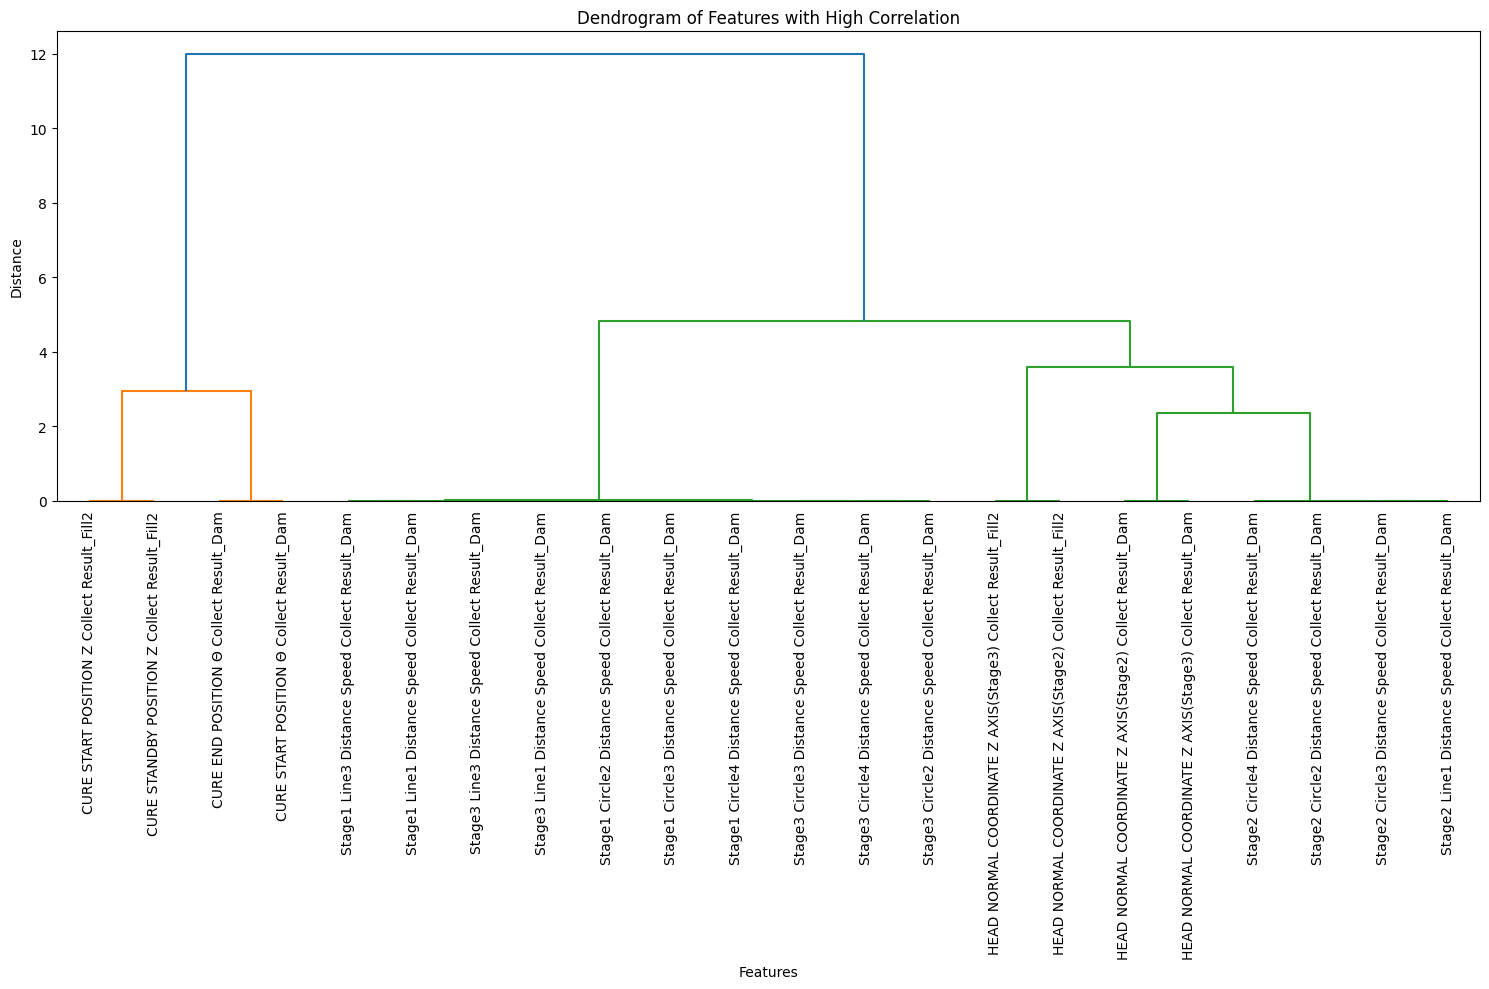

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

filtered_correlations = high_correlation_pairs[
    (abs(high_correlation_pairs['Correlation']) == 1) & (high_correlation_pairs['Feature_1'] != high_correlation_pairs['Feature_2'])
].sort_values(by='Correlation', ascending=False).drop_duplicates()

# Extract the unique feature names from the filtered correlations
unique_features = list(set(filtered_correlations['Feature_1']).union(set(filtered_correlations['Feature_2'])))

# Filter the original correlation matrix to keep only the relevant features
filtered_correlation_matrix = correlation_matrix.loc[unique_features, unique_features]

# Perform hierarchical clustering
Z = linkage(filtered_correlation_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=filtered_correlation_matrix.columns, leaf_rotation=90)
plt.title('Dendrogram of Features with High Correlation')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
import pandas as pd

# Assuming Z and pca_data_cleaned are already defined earlier in your script

# Threshold set to identify clusters (this can be adjusted)
threshold = 1.5  # Distance threshold
clusters = fcluster(Z, threshold, criterion='distance')

# Create a DataFrame to map features to their clusters
clustered_features = pd.DataFrame({'Feature': filtered_correlation_matrix.columns, 'Cluster': clusters})

# Step 2: Apply PCA within each cluster and drop original features
pca_components = {}
pca_data = pd.DataFrame(index=pca_data_cleaned.index)

for cluster in clustered_features['Cluster'].unique():
    cluster_features = clustered_features[clustered_features['Cluster'] == cluster]['Feature'].values
    if len(cluster_features) > 1:
        # Standardize the data before applying PCA
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(pca_data_cleaned[cluster_features])

        # Apply PCA
        pca = PCA(n_components=1)  # Keeping only the first principal component
        principal_component = pca.fit_transform(scaled_data)
        
        # Create a new feature name for the principal component
        pca_feature_name = f'Cluster_{cluster}_PC1'
        pca_data[pca_feature_name] = principal_component.flatten()
        pca_components[cluster] = pca.components_
        
        # Drop the original features that were used in this cluster
        pca_data_cleaned.drop(columns=cluster_features, inplace=True)
    else:
        # If the cluster has only one feature, keep it as is
        pca_data[cluster_features[0]] = pca_data_cleaned[cluster_features[0]]

# Now add the PCA components to pca_data_cleaned
pca_data_cleaned = pd.concat([pca_data_cleaned, pca_data], axis=1)

# Display the new dataset with PCA components and without original features used in PCA
pca_data_cleaned.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE SPEED Collect Result_Dam,...,PCA_Group_7_PC1,PCA_Group_8_PC1,PCA_Group_9_PC1,PCA_Group_10_PC1,Cluster_3_PC1,Cluster_4_PC1,Cluster_6_PC1,Cluster_5_PC1,Cluster_1_PC1,Cluster_2_PC1
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,100,...,-93.198060,-61.778264,-115.831536,26.241892,-1.212169,-1.112256,-1.606349,2.541497,-0.303636,-1.112023
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,70,...,136.348625,90.370479,169.440684,-45.787368,-4.597435,-1.112256,1.672034,-0.452892,-0.303636,-1.112023
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,85,...,-93.221059,-61.778264,-115.831536,41.621483,-1.212169,1.798147,-1.606349,2.612045,-0.303636,1.798523
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,70,...,136.348625,90.370479,169.440684,-37.967193,-4.597435,1.798147,-1.872164,-0.452892,-0.303636,1.798523
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,70,...,136.348625,90.370479,169.440684,-44.223333,4.806082,-1.112256,1.672034,-1.491521,-0.303636,-1.112023


In [12]:
pca_data_cleaned['target']

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
           ...   
40501      Normal
40502      Normal
40503      Normal
40504      Normal
40505    AbNormal
Name: target, Length: 40506, dtype: object

범주형 원핫인코딩 

In [13]:
categorical_columns = pca_data_cleaned.select_dtypes(include=['object']).columns

In [14]:
# One-hot encode categorical columns, excluding the target column
pca_data_cleaned = pd.get_dummies(pca_data_cleaned, columns=categorical_columns.drop('target'))

In [15]:
pca_data_cleaned = pca_data_cleaned.drop(columns=[
    'Chamber Temp. Judge Value_AutoClave_NG'
])

오버샘플링 (SMOTE)

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = pca_data_cleaned.drop(columns=["target"])
y = pca_data_cleaned["target"]

# Apply SMOTE to balance the classes in the dataset
smote = SMOTE(sampling_strategy='auto', random_state=RANDOM_STATE)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target back into a DataFrame
df_concat = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["target"])], axis=1)

# Print the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(df_concat['target'].value_counts())

Class distribution after SMOTE:
target
Normal      38156
AbNormal    38156
Name: count, dtype: int64


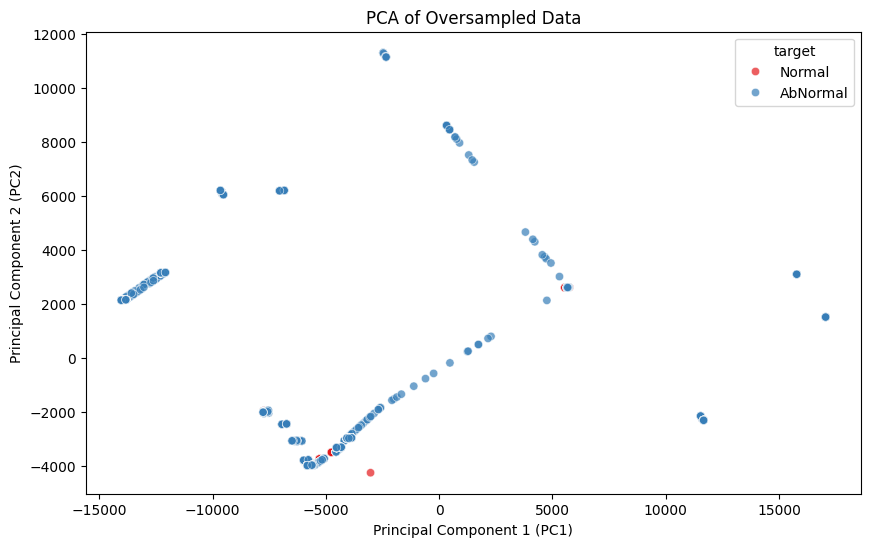

In [27]:
# Reduce the data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_concat.drop(columns=["target"]))

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['target'] = df_concat['target']

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='Set1', alpha=0.7)
plt.title('PCA of Oversampled Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

In [17]:
#데이터 분할
df_train, df_val = train_test_split(
    df_concat,
    test_size=0.3,
    stratify=df_concat["target"],
    random_state=RANDOM_STATE,
)

def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])

    print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}" + f" ratio: {num_abnormal/num_normal}")

# Print statistics
print(f"  \tAbnormal\tNormal")
print_stats(df_train)
print_stats(df_val)

  	Abnormal	Normal
  Total: Normal: 26709, AbNormal: 26709 ratio: 1.0
  Total: Normal: 11447, AbNormal: 11447 ratio: 1.0


In [18]:
# Separate the target column from the features before any preprocessing
train_y = df_train["target"]
val_y = df_val["target"]

# Drop the target column from the training and validation data
df_train = df_train.drop(columns=["target"])
df_val = df_val.drop(columns=["target"])

# 모델학습

In [19]:
model = RandomForestClassifier(random_state=RANDOM_STATE)

In [20]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

train_x = df_train[features]

model.fit(train_x, train_y)

RandomForestClassifier(random_state=110)

In [21]:
# Preprocess the validation data (ensure it has the same features as train_x)
val_x = df_val[features]  # Select only the features that were used for training

# Make predictions on the validation set
val_predictions = model.predict(val_x)

Validation F1 Score (AbNormal): 0.93
              precision    recall  f1-score   support

    AbNormal       0.93      0.93      0.93     11447
      Normal       0.93      0.93      0.93     11447

    accuracy                           0.93     22894
   macro avg       0.93      0.93      0.93     22894
weighted avg       0.93      0.93      0.93     22894



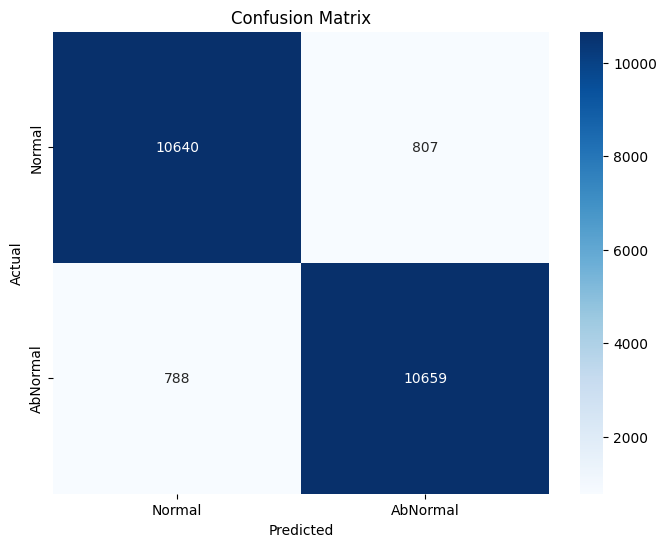

In [22]:
import seaborn as sns
# Calculate F1 score
f1 = f1_score(val_y, val_predictions, pos_label="AbNormal")
print(f"Validation F1 Score (AbNormal): {f1:.2f}")

# Print detailed classification report
print(classification_report(val_y, val_predictions))

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_y, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "AbNormal"], yticklabels=["Normal", "AbNormal"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [23]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': val_x.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importances.head(10))

                                     Feature  Importance
49    Chamber Temp. Collect Result_AutoClave    0.047606
68       Production Qty Collect Result_Fill1    0.047325
94       Production Qty Collect Result_Fill2    0.046350
26         Production Qty Collect Result_Dam    0.046315
106                         PCA_Group_10_PC1    0.039369
69            Receip No Collect Result_Fill1    0.027758
95            Receip No Collect Result_Fill2    0.027354
27              Receip No Collect Result_Dam    0.027248
1473  Chamber Temp. Judge Value_AutoClave_OK    0.023807
67    Machine Tact time Collect Result_Fill1    0.009292


# 테스트데이터 예측

In [24]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))

In [25]:
# Drop those columns
test_data = test_data.drop(columns=columns_with_nulls)
test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,12.5,...,91.8,270.0,50,85,19.8,13.0,195,1,0,NaN
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,12.5,...,50.0,91.8,270,50,85.0,19.8,14,256,1,NaN
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,2.5,...,91.8,270.0,50,85,19.7,1.0,98,1,0,NaN
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,12.5,...,50.0,91.8,270,50,85.0,20.0,14,0,1,NaN
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,2.5,...,50.0,91.8,270,50,85.0,19.8,1,215,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,12.5,...,50.0,91.8,270,50,85.0,19.5,14,131,1,NaN
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,12.5,...,50.0,91.8,270,50,85.0,19.8,12,279,1,NaN
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,2.5,...,50.0,91.8,270,50,85.0,20.5,4,66,1,NaN
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,2.5,...,91.8,270.0,50,85,18.9,1.0,117,1,0,NaN


In [26]:
# 차원축소
pca_data_cleaned = test_data.copy()

# List to keep track of the names of the new PCA features
new_pca_columns = []

for i, group in enumerate(groups):
    # Drop rows with missing values in the current group
    clean_data_group = test_data[group].dropna()
    
    # Apply PCA with 1 component
    pca = PCA(n_components=1)
    pca_result = pca.fit_transform(clean_data_group)
    
    # Analyze the explained variance
    explained_variance_ratio = pca.explained_variance_ratio_[0]
    print(f"Group {i+1} - Variance captured by the first component: {explained_variance_ratio * 100:.2f}%")
    
    # Create a new column for the PCA result in the original DataFrame
    pca_column_name = f'PCA_Group_{i+1}_PC1'
    test_data[pca_column_name] = pd.Series(pca_result.flatten(), index=clean_data_group.index)
    
    # Add the new column name to the list
    new_pca_columns.append(pca_column_name)
    
    # Drop the original columns that were used in this group
    test_data.drop(columns=group, inplace=True)

Group 1 - Variance captured by the first component: 99.92%
Group 2 - Variance captured by the first component: 99.98%
Group 3 - Variance captured by the first component: 99.96%
Group 4 - Variance captured by the first component: 100.00%
Group 5 - Variance captured by the first component: 100.00%
Group 6 - Variance captured by the first component: 98.58%
Group 7 - Variance captured by the first component: 100.00%
Group 8 - Variance captured by the first component: 100.00%
Group 9 - Variance captured by the first component: 100.00%
Group 10 - Variance captured by the first component: 98.76%


In [27]:
pca_data = pd.DataFrame(index=test_data.index)

for cluster in clustered_features['Cluster'].unique():
    cluster_features = clustered_features[clustered_features['Cluster'] == cluster]['Feature'].values
    if len(cluster_features) > 1:
        # Standardize the data before applying PCA
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(pca_data_cleaned[cluster_features])

        # Apply PCA
        pca = PCA(n_components=1)  # Keeping only the first principal component
        principal_component = pca.fit_transform(scaled_data)
        
        # Create a new feature name for the principal component
        pca_feature_name = f'Cluster_{cluster}_PC1'
        pca_data[pca_feature_name] = principal_component.flatten()
        pca_components[cluster] = pca.components_
        
        # Drop the original features that were used in this cluster
        pca_data_cleaned.drop(columns=cluster_features, inplace=True)
    else:
        # If the cluster has only one feature, keep it as is
        pca_data[cluster_features[0]] = pca_data_cleaned[cluster_features[0]]

# Now add the PCA components to pca_data_cleaned
pca_data_cleaned = pd.concat([pca_data_cleaned, pca_data], axis=1)

# Display the new dataset with PCA components and without original features used in PCA
pca_data_cleaned.head()

NameError: name 'scalers' is not defined

In [74]:
categorical_columns = test_data.select_dtypes(include=['object']).columns

In [ ]:
categorical_columns

In [75]:
# One-hot encode categorical columns, excluding the target column
test_data = pd.get_dummies(test_data, columns=categorical_columns)

In [ ]:
test_data.info()

In [76]:
# Filter features to ensure compatibility between training and testing data
features_in_test_data = [col for col in features if col in test_data.columns]

# Prepare the test data
df_test_x = test_data[features_in_test_data]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [77]:
# Get the list of all features used during training
all_features = model.feature_names_in_

# Add missing columns to df_test_x with a value of 0
for col in all_features:
    if col not in df_test_x.columns:
        df_test_x[col] = 0

# Reorder the columns in df_test_x to match the order of features used during training
df_test_x = df_test_x[all_features]

# Now you can safely make predictions with the model
test_pred = model.predict(df_test_x)

/tmp/ipykernel_55/411420571.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_x[col] = 0
/tmp/ipykernel_55/411420571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_x[col] = 0
/tmp/ipykernel_55/411420571.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_x[co

In [78]:
test_pred

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [79]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)